# 랜덤 포레스트_분류

#### - 유방암 결과를 분류하는 랜덤 포레스트 모델을 만들고, predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 예측/회귀 Decision Tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# 나무 구조 시각화  
from sklearn.tree import plot_tree

In [2]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

In [3]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/유방암.CSV" , encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


#### 결측치 확인

In [4]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

> 결측치를 확인해보니 존재하지 않았다. 따라서 결측치를 대체해줄 필요도 없다.

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

> info()를 통해 각 설명변수의 데이터 타입을 확인해보니 다 연속형(float) 변수이므로 더미변수를 생성할 필요가 없다.

#### - 목표변수 변환 및 데이터 변환

In [6]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 1, 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


> 유방암 진단에 대해 양성은 1, 음성은 0으로 변환해주었다.

In [7]:
df_raw_x = df_raw.drop("diagnosis", axis = 1)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [8]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 2. 모델 생성

#### - 기본 옵션으로 모델 생성

In [9]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.922


In [10]:
rf_uncustomized

RandomForestClassifier(random_state=1234)

> 랜덤 포레스트 모델을 파라미터 변동 없이 기본 옵션으로 시행했을 때 모델은 train data에서는 100%, test data로는 92.2%의 정확도를 가진다. 모델이 train data에 대해서 **과적합**인 것을 알 수 있다. 파라미터 변경을 통해 과적합을 방지하고 안정적인 모델을 생성해보자.

### 2-1. 파라미터 조정

#### - n_estimators : 트리 수 변경에 따른 모델 성능

In [11]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# n-estimators
para_n_tree = [n_tree*10 for n_tree in range(1, 14)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.000,0.922
1,20,0.995,0.906
2,30,1.000,0.914
3,40,1.000,0.914
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.922


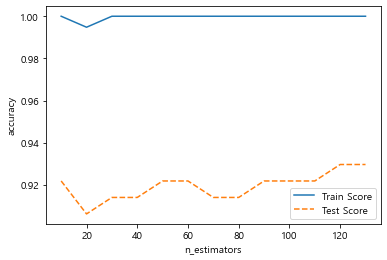

In [12]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label= "Test Score")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

> 생성되는 트리 수가 증가함에 따라 모델의 정확도는 증가한다.train 데이터의 정확도는 일정하므로 성능 변화가 없고, test 데이터의 정확도가 높은 구간과 두 데이터 간의 간격이 좁은(성능이 좋은) 구간을 고려하여 **트리 수를 50 혹은 60으로 선택**하려고 한다. 트리 수를 선택하기 위해 OOB 평가를 통해 적절한 트리 수를 확정하려고 한다.

In [13]:
oob_error = []

for v_n_estimator in range(1, 101):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Myung-jin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means

Text(0.5, 0, 'n_estimators')

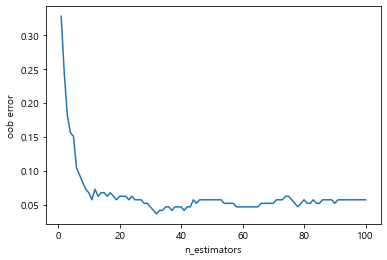

In [14]:
plt.plot(range(1, 101), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

> 생성되는 트리 수가 증가하면 모델의 정확도가 증가하지만 OOB error는 감소한다. 모델은 유방암을 진단하는 기준인데 병을 판단하는 요인은 너무 다양하기 때문에 트리 수를 늘려도 된다고 생각했고, OOB 에러와 위의 결과를 다 고려해서 **트리 수를 60을 선택**하였다.

#### - max_depth: 최대 깊이 변경에 따른 정확도 변화

In [15]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# depth
para_depth = [depth for depth in range(1, 21)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators =70, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.948,0.922
1,2,0.974,0.906
2,3,0.990,0.922
3,4,0.995,0.914
4,5,1.000,0.930
5,6,1.000,0.914
6,7,1.000,0.914
7,8,1.000,0.914
8,9,1.000,0.914
9,10,1.000,0.914


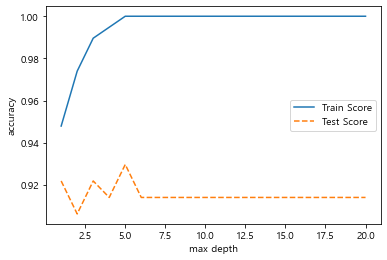

In [16]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Score")
plt.ylabel("accuracy"); plt.xlabel("max depth")
plt.legend()

> 최대 깊이가 증가하면서 데이터의 정확도가 증가할 거라고 생각했는데 증가하면서 정확도가 변동이 없다는 것을 볼 수 있다. 즉 성능의 변화가 없다는 뜻이다. 그래서 train 데이터와 test 데이터의 성능 차가 작은, test 데이터의 정확도가 높은 구간을 판단을 하여 **최대 깊이를 5로 선택**하였다.

#### - min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [17]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split
para_split = [n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split =  v_min_samples_split, max_depth = 5, n_estimators =60, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["split"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,split,TrainAccuracy,TestAccuracy
0,10,0.990,0.914
1,20,0.984,0.914
2,30,0.984,0.906
3,40,0.984,0.906
4,50,0.974,0.898
5,60,0.969,0.898
6,70,0.953,0.898
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


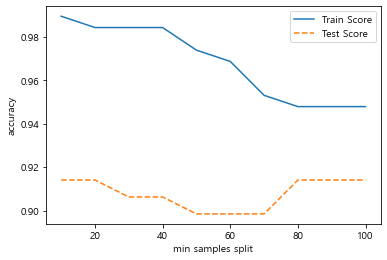

In [18]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label= "Test Score")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

> 분리 노드의 최소 자료 수가 증가하면서 데이터의 정확도가 감소한다.(min_samples_split을 100이 아닌 200까지로 잡았을 때 test 데이터의 정확도도 감소하는 경향을 보였다.) 80부터는 데이터의 정확도에 변동이 없는데 80을 지정하기 되면 너무 큰 수를 지정하는 것이 아닐까 판단되어 특정 값을 지정하지 않고 다른 파라미터를 살펴볼 것이다.

#### - min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split
para_leaf = [n_leaf*10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 5, n_estimators =60, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["leaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,leaf,TrainAccuracy,TestAccuracy
0,10,0.969,0.906
1,20,0.958,0.914
2,30,0.948,0.898
3,40,0.943,0.914
4,50,0.958,0.914
5,60,0.943,0.906
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


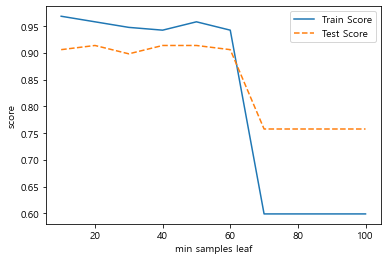

In [20]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label= "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

> 분리 노드의 최소 자료 수가 증가하면서 모델의 정확성은 감소한다. train 데이터와 test 데이터의 성능 변화를 고려해서 두 데이터 정확도의 차이가 적고 모델의 정확성을 높일 수 있는 구간을 판단하였다. **분리 노드의 최소 자료수를 20**으로 선정하였다.

## 3. 결론 도출

#### - 최종 모델 선택

In [21]:
# 최종 모델
rf_final = RandomForestClassifier(n_estimators=60, min_samples_leaf=20,
                                  max_depth=5, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, n_estimators=60,
                       random_state=1234)

#### - 최종 모델 시각화

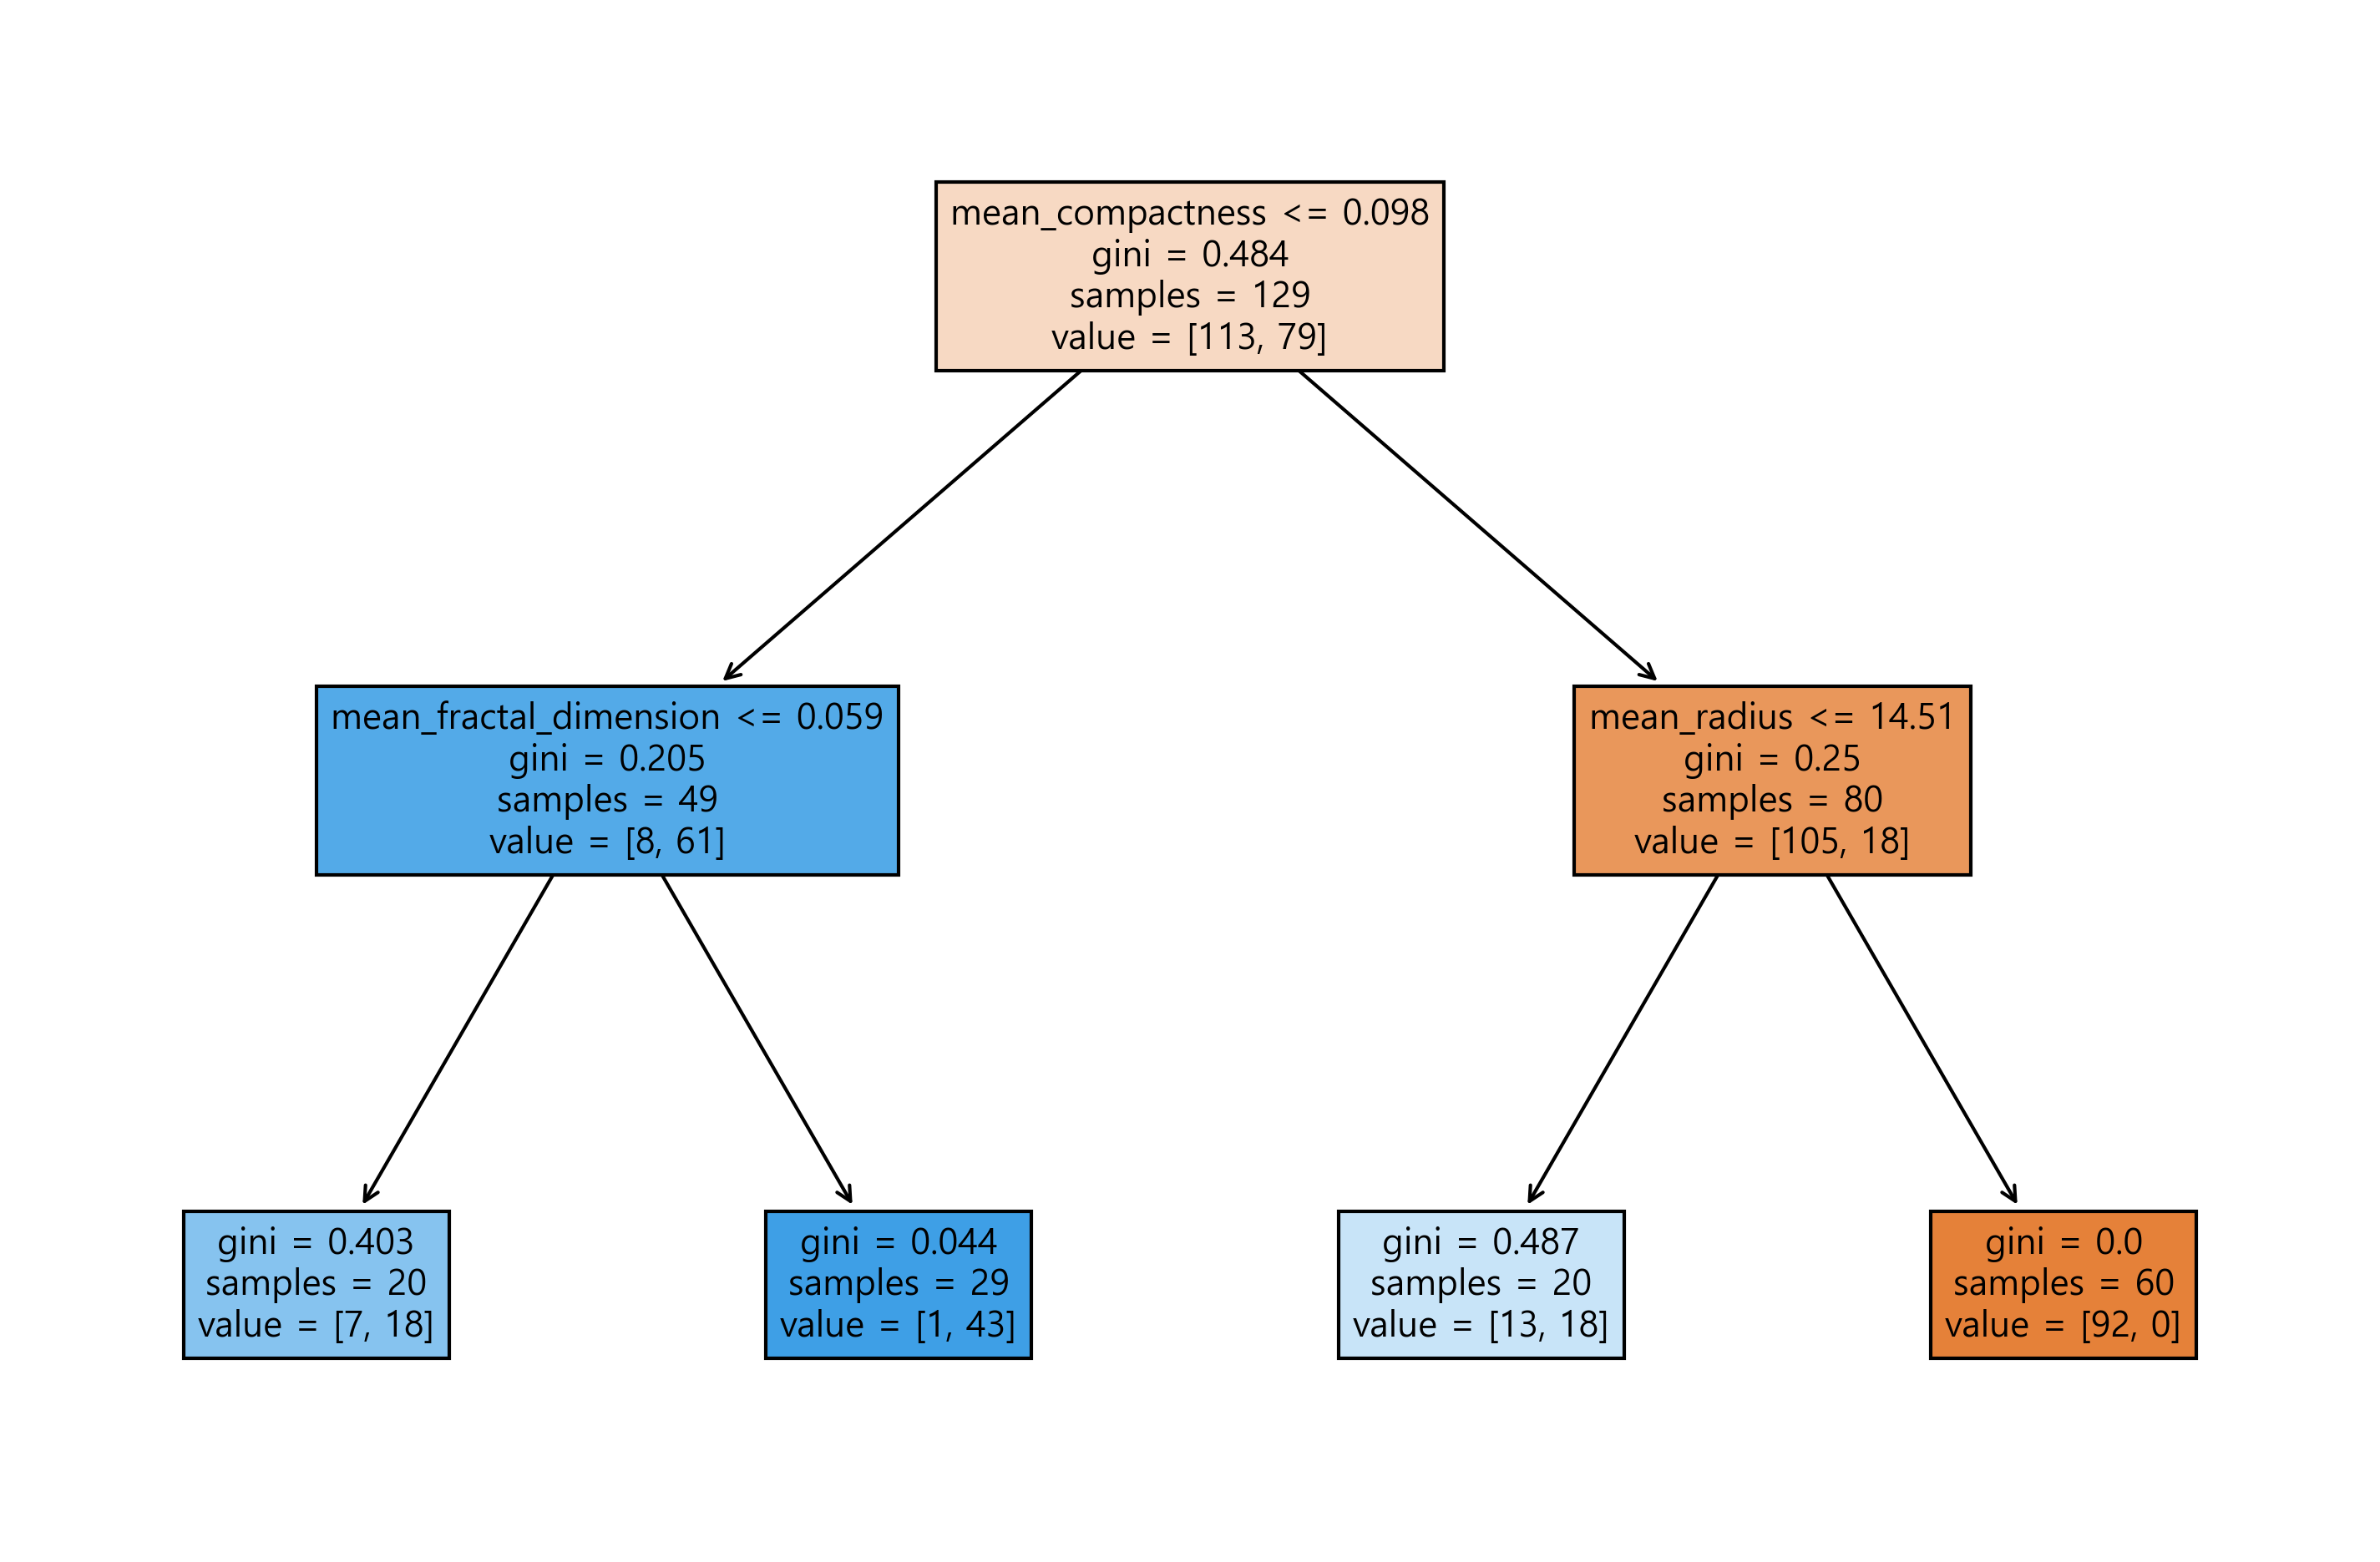

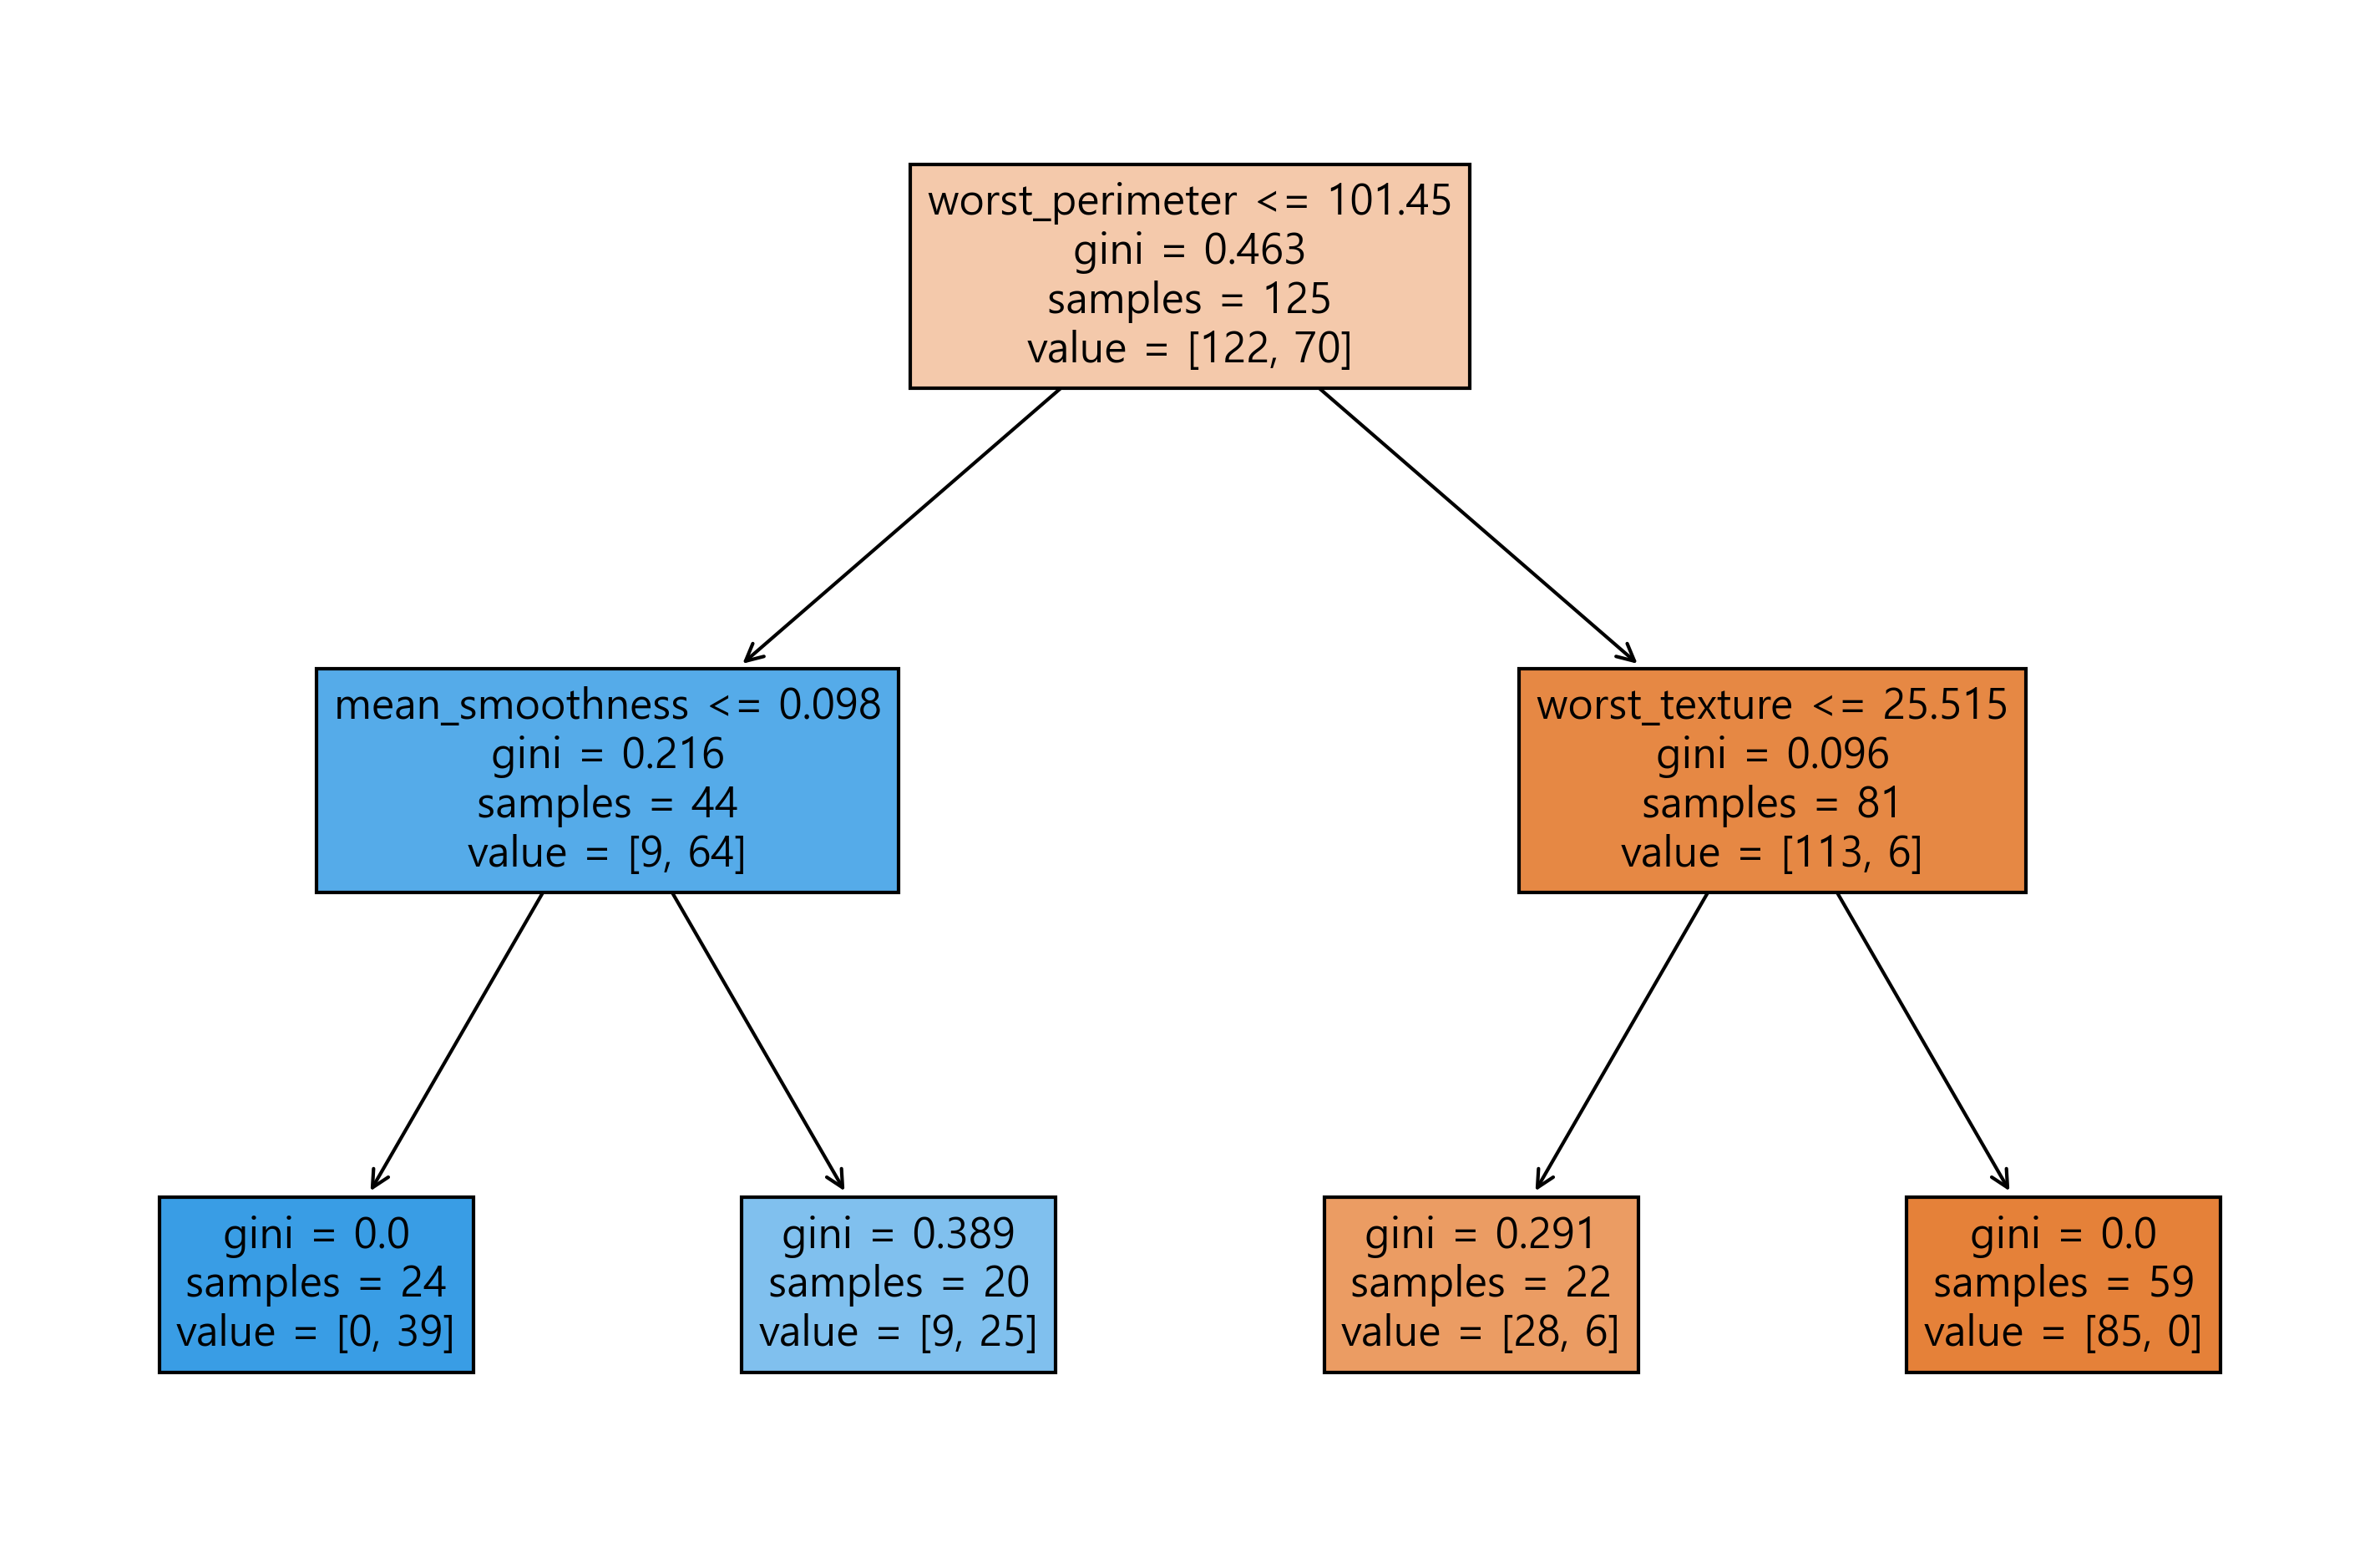

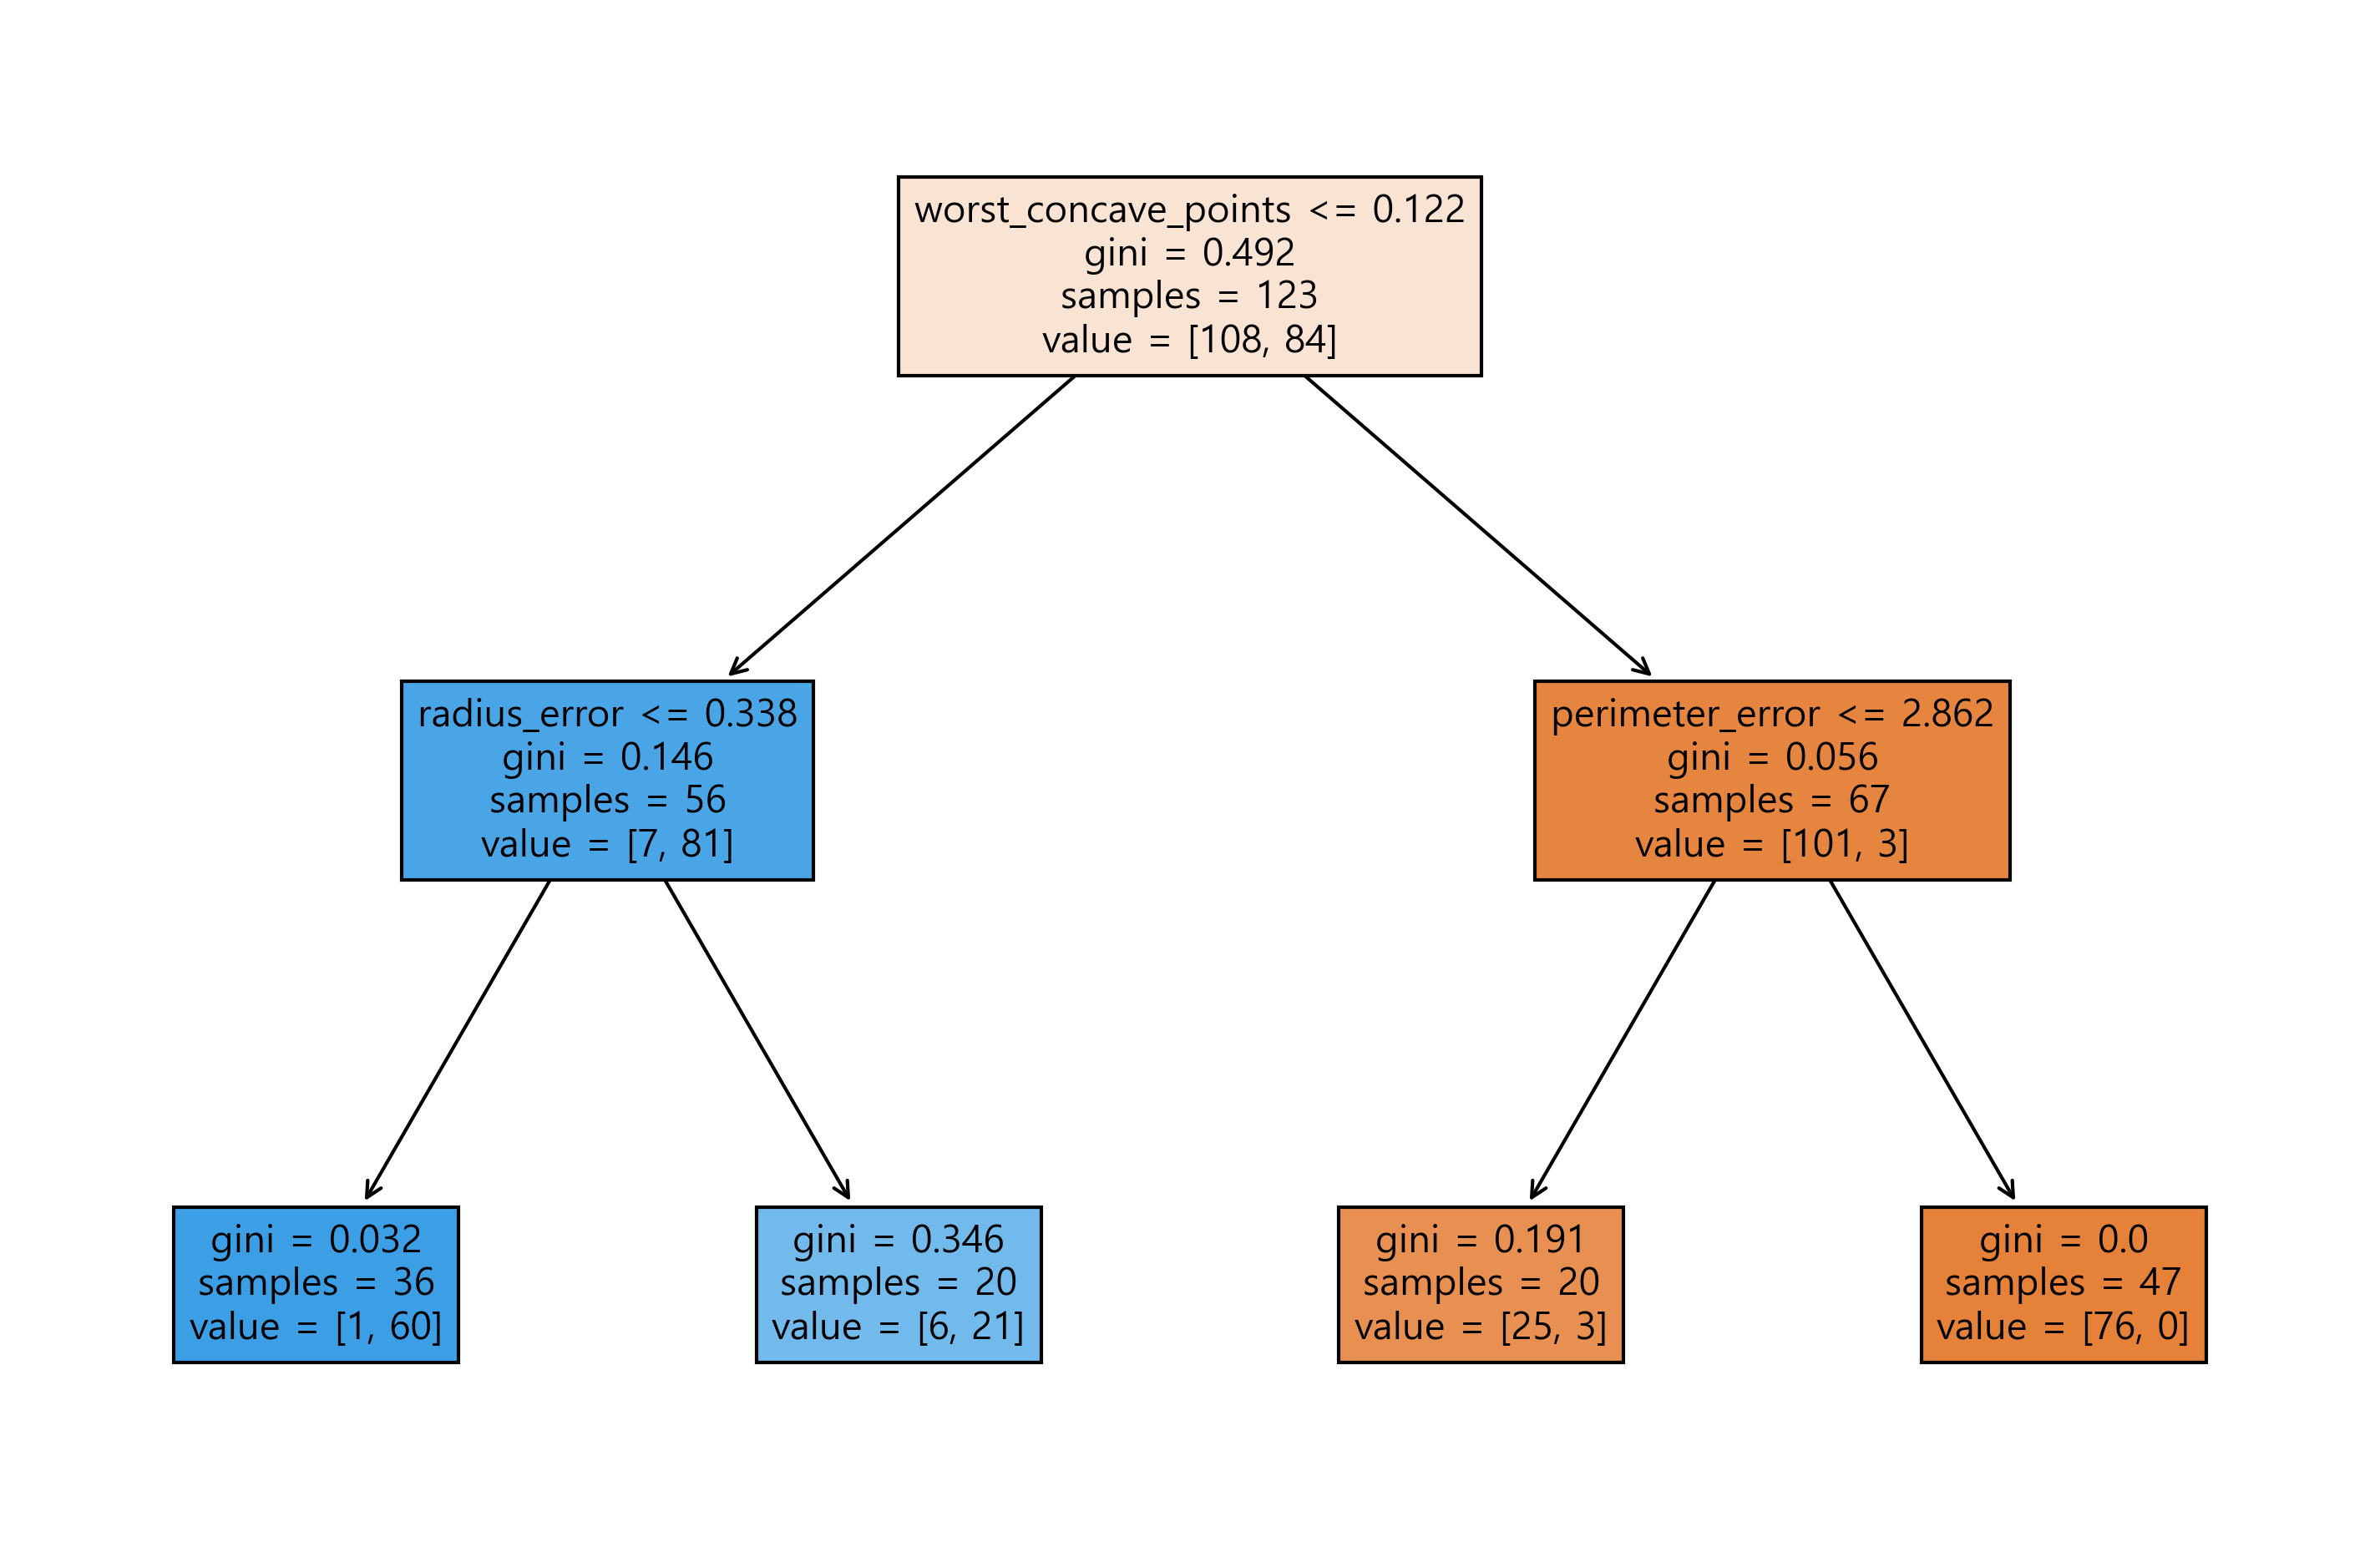

In [22]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[0], feature_names = v_feature_name, filled = True);
# 1번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[1], feature_names = v_feature_name, filled = True);
# 10번 트리
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12, 8), dpi=300)
plot_tree(rf_final.estimators_[10], feature_names = v_feature_name, filled = True);

In [23]:
y_pred = rf_final.predict(df_test_x)

print("목표변수 y 범주 예측(y_pred) :", y_pred)
print()

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print()

# test 데이터 설명력
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

목표변수 y 범주 예측(y_pred) : [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]

Score on training set : 0.958

Score on test set : 0.914
Confusion matrix: 
[[92  5]
 [ 6 25]]


> predict method를 통해 y(목표변수)의 범주를 예측해보면, 0과 1로 이루어져 있으므로 **목표변수의 범주는 0, 1**이다. 분류를 통해 범주형 레이블 0과 1로 예측하였다는 뜻이다. 이 말은 곧 **유방암을 판정하는 30개의 증상(설명변수)에 따라 유방암이 음성인지, 양성인지 여부를 예측한다**는 것이다.  
  
> 최종 생성된 모델을 test data로 정확도 검증 실행해본 결과 **정확도는 0.914**이다. **confusion matrix는 [[92 5][6 25]]** 행렬이라는 것을 확인했다. confusion matrix을 통해 정확도를 다시 한번 검증해보면 $(92 + 25)/(92 + 5 + 6 + 25) = 117/ 128 = 0.914$로 똑같이 나오는 것을 알 수 있다. 이 수치는 안정적인 모델임을 뜻한다. 또한 신기하게도 앞전에 생성한 의사결정나무와 정확도가 일치하는 것을 볼 수 있다. 이제 아무 파라미터를 지정하지 않았던 기본 모델과의 비교를 해보자.   

> - Accucary on training set: 1.000 -> 0.958  
> - Accucary on test set: 0.922 -> 0.914  

> training 데이터의 정확도가 소폭 감소하였고, test 데이터의 정확도가 92.2%에서 91.4%로 하락하였다. 하지만 **train 데이터의 정확도 하락을 통해 과적합을 방지하였고 train 데이터와 test 데이터 간격이 좁아져 성능이 좋아졌다**고 볼 수 있다. 하지만 **test 데이터에 대해 정확도가 하락한 부분은 파라미터 수정을 통해 개선**시킬 여지가 있는 것 같다.

#### - 설명변수의 중요도

In [24]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
6,mean_concavity,0.151
22,worst_perimeter,0.132
23,worst_area,0.112
7,mean_concave_points,0.109
27,worst_concave_points,0.105
20,worst_radius,0.084
3,mean_area,0.056
0,mean_radius,0.050
26,worst_concavity,0.048
2,mean_perimeter,0.043


Text(0, 0.5, '변수')

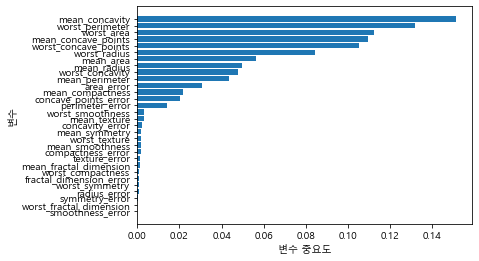

In [25]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])

plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

> 몇몇 설명변수들의 중요도가 0이라는 것은 이 설명변수들이 중요하지 않다는 뜻이 아니고, 이 랜덤 포레스트 모델링에 영향을 주지 않는다는 것이다. 하지만 다른 모델을 구축하거나 train 데이터가 달라진다면 중요도가 변경될 수 있다.   
  
> 랜덤 포레스트 모델을 생성하는데(유방암 진단 모델링) 영향을 주는 중요 설명변수는 평균적으로 오목한 정도(mean_concavity)과 둘레(worst_perimeter), 영역넓이(worst_area) 순이다. 하지만 그래프를 살펴보면 **많은 설명변수들이 유방암 진단을 하는데 영향을 끼친다**는 것을 알 수 있다. 유방암을 진단하는, 병증을 판단하기 위한 변칙적인 요인은 정말 무수히 많다. 그런 면에서 이 모델은 이전의 의사결정나무보다 더 정확성은 떨어질지라도 영향을 끼치는 변수가 여러 개이기에 현실적인 요인이 잘 반영되지 않았나 주관적으로 판단했다. 하지만 제일 우선적이어야 하는 건 **객관적인 지표 : 정확도와 성능이기에 이를 참고하여 추후 개선이 필요**하다. 